In [1]:
!pip install pyFTS
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.6 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import pyFTS
import dill

from pyFTS.partitioners import Grid
from pyFTS.common import FuzzySet as fz
from pyFTS.common import FLR
from pyFTS.models import chen
from pyFTS.common import FuzzySet as fz
from pyFTS.common import Util
from pyFTS.models import hofts, pwfts
from pyFTS.benchmarks import Measures
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('BRIS.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-11-08 00:00:00+07:00,1337.115466,1341.925156,1322.686157,1322.686157,4545739,0.0,0.0
1,2022-11-09 00:00:00+07:00,1322.686157,1327.495847,1313.066537,1322.686157,6810355,0.0,0.0
2,2022-11-10 00:00:00+07:00,1322.686157,1322.686157,1303.447038,1322.686157,6107808,0.0,0.0
3,2022-11-11 00:00:00+07:00,1327.495847,1346.734966,1317.876347,1322.686157,7463482,0.0,0.0
4,2022-11-14 00:00:00+07:00,1327.495850,1337.115469,1317.876350,1327.495850,7712018,0.0,0.0
...,...,...,...,...,...,...,...,...
477,2024-11-04 00:00:00+07:00,2950.000000,2970.000000,2900.000000,2940.000000,25366100,0.0,0.0
478,2024-11-05 00:00:00+07:00,2950.000000,2980.000000,2920.000000,2970.000000,19428800,0.0,0.0
479,2024-11-06 00:00:00+07:00,2980.000000,2990.000000,2860.000000,2900.000000,24015300,0.0,0.0
480,2024-11-07 00:00:00+07:00,2900.000000,2910.000000,2800.000000,2850.000000,27464600,0.0,0.0


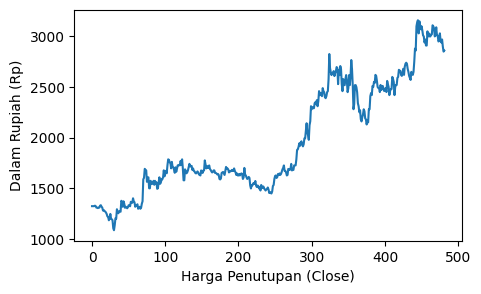

In [4]:
fig = plt.subplots(figsize=[5,3])

plt.xlabel('Harga Penutupan (Close)')
plt.ylabel('Dalam Rupiah (Rp)')
plt.plot(data['Close'])

In [5]:
data.drop_duplicates(inplace=True)

data.dropna(inplace=True)

In [6]:
data['Close'].isnull().sum()

0

In [7]:
data.duplicated().sum()

0

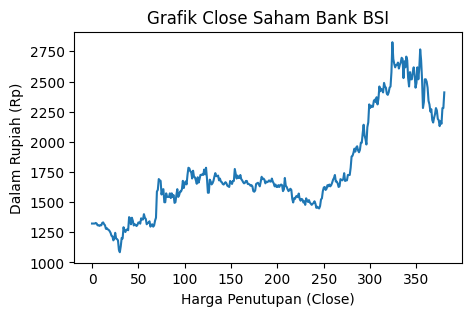

In [8]:
train = data['Close'].values[:381]
test = data['Close'].values[100:]

fig = plt.subplots(figsize=[5,3])

plt.title('Grafik Close Saham Bank BSI')
plt.xlabel('Harga Penutupan (Close)')
plt.ylabel('Dalam Rupiah (Rp)')
plt.plot(train)

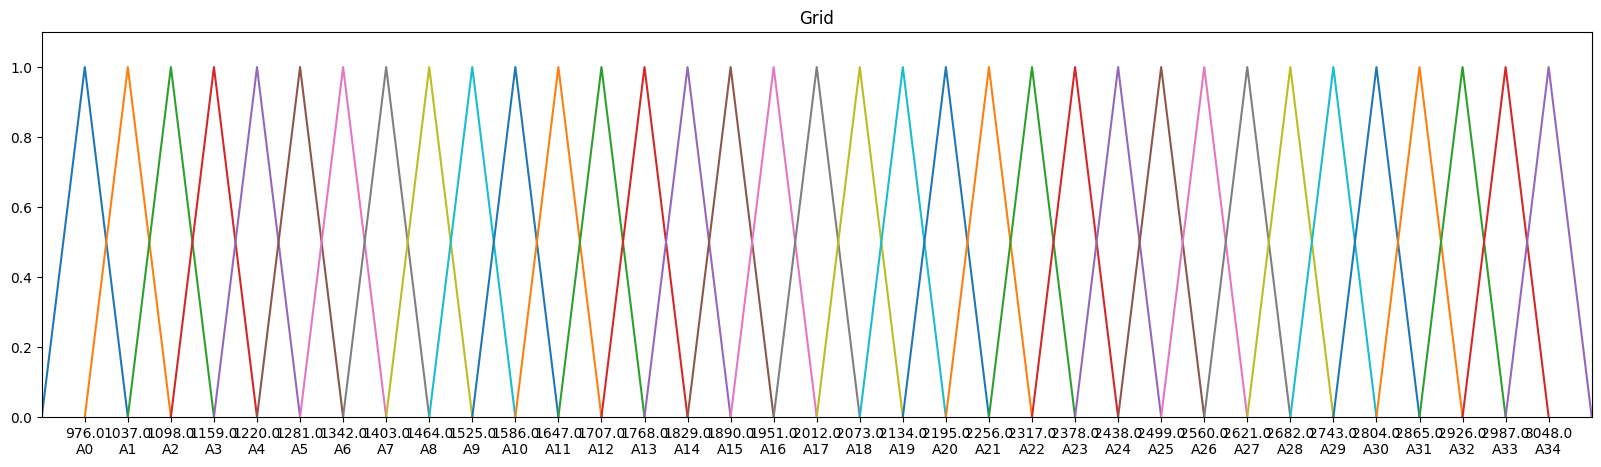

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[20,5])
part = Grid.GridPartitioner(data=train,npart=35)
part.plot(ax)

In [10]:
F = fz.fuzzyfy_series(train, part.sets)
print(F)

['A6', 'A6', 'A6', 'A6', 'A6', 'A6', 'A5', 'A5', 'A5', 'A5', 'A5', 'A6', 'A6', 'A6', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A4', 'A4', 'A4', 'A3', 'A4', 'A4', 'A4', 'A4', 'A3', 'A2', 'A2', 'A3', 'A4', 'A4', 'A5', 'A5', 'A5', 'A5', 'A5', 'A5', 'A7', 'A6', 'A6', 'A6', 'A6', 'A5', 'A6', 'A6', 'A5', 'A6', 'A6', 'A6', 'A6', 'A6', 'A6', 'A6', 'A7', 'A6', 'A6', 'A6', 'A6', 'A6', 'A6', 'A5', 'A6', 'A6', 'A5', 'A5', 'A6', 'A6', 'A10', 'A10', 'A12', 'A12', 'A11', 'A10', 'A10', 'A10', 'A9', 'A9', 'A10', 'A9', 'A9', 'A9', 'A10', 'A9', 'A10', 'A9', 'A10', 'A9', 'A9', 'A10', 'A10', 'A9', 'A10', 'A10', 'A10', 'A10', 'A11', 'A11', 'A11', 'A11', 'A11', 'A12', 'A13', 'A13', 'A13', 'A13', 'A12', 'A13', 'A12', 'A12', 'A12', 'A11', 'A12', 'A11', 'A12', 'A12', 'A12', 'A12', 'A12', 'A13', 'A12', 'A13', 'A12', 'A10', 'A10', 'A12', 'A11', 'A11', 'A11', 'A11', 'A12', 'A13', 'A12', 'A12', 'A12', 'A12', 'A12', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', 'A11', '

In [11]:
FD = pd.DataFrame(F)
print(FD)

       0
0     A6
1     A6
2     A6
3     A6
4     A6
..   ...
376  A20
377  A19
378  A21
379  A21
380  A24

[381 rows x 1 columns]


In [12]:
rules = FLR.generate_non_recurrent_flrs(F)
print([str(k) for k in rules[0:10]])

['A6 -> A6', 'A6 -> A5', 'A5 -> A5', 'A5 -> A6', 'A5 -> A4', 'A4 -> A4', 'A4 -> A3', 'A3 -> A4', 'A3 -> A2', 'A2 -> A2']


In [14]:
np.int = int
np.int8 = np.int8
np.int16 = np.int16
np.int32 = np.int32
np.int64 = np.int64

In [15]:
model = chen.ConventionalFTS(partitioner=part)
model.fit(train)
print(model)

Conventional FTS:
A2 -> A2,A3
A3 -> A2,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6,A7
A7 -> A6
A6 -> A10,A5,A6,A7
A8 -> A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A12,A9
A12 -> A10,A11,A12,A13
A11 -> A10,A11,A12,A13
A13 -> A11,A12,A13,A15
A15 -> A15,A16
A16 -> A15,A16,A17,A19
A17 -> A16,A17,A18
A18 -> A17,A19
A19 -> A18,A19,A20,A21,A22
A20 -> A19,A20,A21
A21 -> A20,A21,A22,A24
A22 -> A21,A22,A23,A25
A23 -> A22,A23,A24
A24 -> A22,A23,A24,A25,A26
A25 -> A21,A24,A25,A26,A27,A28
A26 -> A24,A25,A27,A30
A28 -> A25,A27,A28
A27 -> A25,A26,A27,A28,A29
A30 -> A28
A29 -> A28



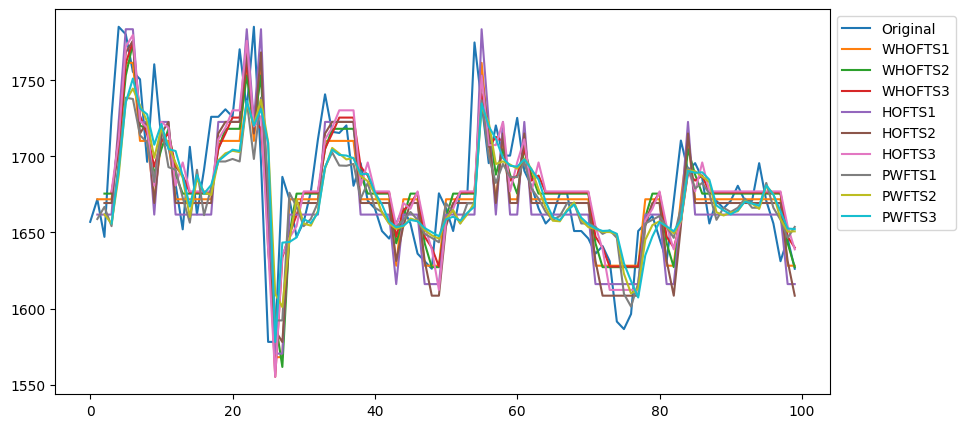

In [16]:
models = []
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])
ax.plot(test[:100], label='Original')
rows = []
for method in [hofts.WeightedHighOrderFTS, hofts.HighOrderFTS, pwfts.ProbabilisticWeightedFTS]:
  for order in [1,2,3]:
    model = method(partitioner=part, order=order)
    model.shortname += str(order)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(order):
      forecasts.insert(0, None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    del(model)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1,1))
pass

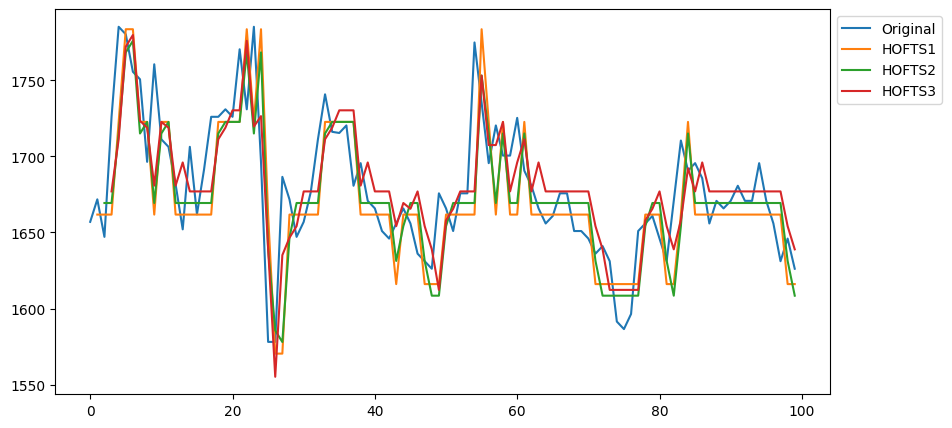

In [ ]:
from pyFTS.common import Util
from pyFTS.models import hofts, pwfts

models = []
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])
ax.plot(test[:100], label='Original')
rows = []
for method in [hofts.HighOrderFTS]:
  for order in [1,2,3]:
    model = method(partitioner=part, order=order)
    model.shortname += str(order)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(order):
      forecasts.insert(0, None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    del(model)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1,1))
pass

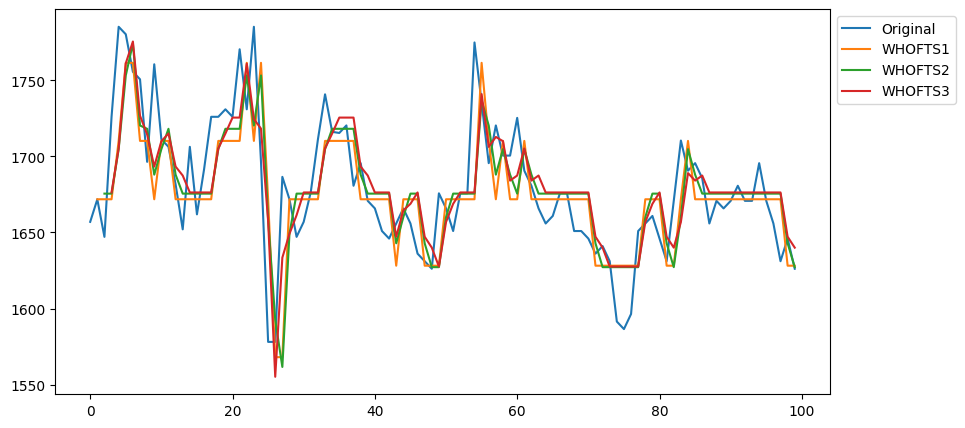

In [ ]:
from pyFTS.common import Util
from pyFTS.models import hofts, pwfts

models = []
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])
ax.plot(test[:100], label='Original')
rows = []
for method in [hofts.WeightedHighOrderFTS]:
  for order in [1,2,3]:
    model = method(partitioner=part, order=order)
    model.shortname += str(order)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(order):
      forecasts.insert(0, None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    del(model)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1,1))
pass

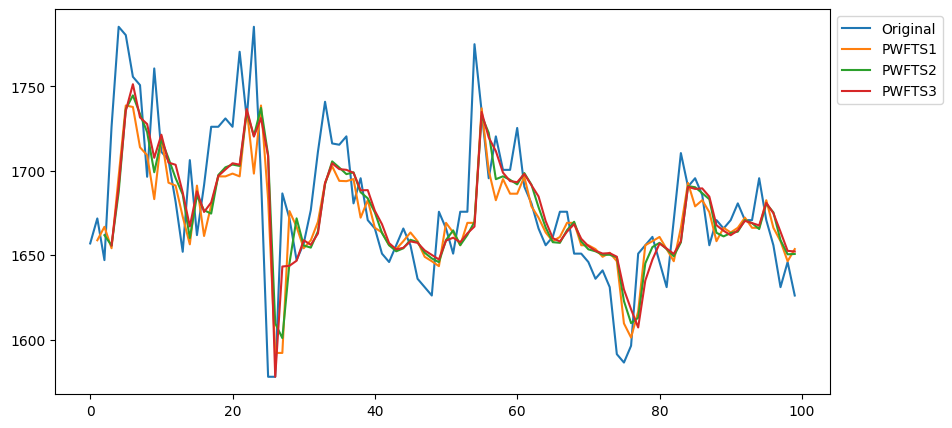

In [ ]:
from pyFTS.common import Util
from pyFTS.models import hofts, pwfts

models = []
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])
ax.plot(test[:100], label='Original')
rows = []
for method in [pwfts.ProbabilisticWeightedFTS]:
  for order in [1,2,3]:
    model = method(partitioner=part, order=order)
    model.shortname += str(order)
    model.fit(train)
    forecasts = model.predict(test)
    for k in np.arange(order):
      forecasts.insert(0, None)
    ax.plot(forecasts[:100], label=model.shortname)
    models.append(model.shortname)
    Util.persist_obj(model, model.shortname)
    del(model)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1,1))
pass

In [17]:
rows = []
for file in models:
  try:
    model = Util.load_obj(file)
    row = [model.shortname, model.order,len(model)]
    rmse, mape, mae = Measures.get_point_statistics(test,model)
    row.extend([rmse/np.mean(test), mape, mae])
    rows.append(row)
  except Exception as e:
    print(f"Error processing {file}: {e}")

results_df = pd.DataFrame(rows, columns=["Model","Order","Size","RMSE", "MAPE", "MSE"])
results_df

,Model,Order,Size,RMSE,MAPE,MSE
0,WHOFTS1,1,31,0.054791,2.67,2.12
1,WHOFTS2,2,172,0.037156,2.13,1.44
2,WHOFTS3,3,663,0.035310,1.94,1.37
3,HOFTS1,1,31,0.055003,2.78,2.13
4,HOFTS2,2,172,0.037725,2.25,1.46
5,HOFTS3,3,663,0.035474,2.00,1.38
6,PWFTS1,1,31,0.056463,2.69,2.19
7,PWFTS2,2,172,0.460870,12.05,17.69
8,PWFTS3,3,663,0.461355,11.89,17.73
